In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report,ConfusionMatrixDisplay

In [2]:
data= pd.read_csv("Weather_Data.csv")

In [3]:
data.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [4]:
data.shape

(8784, 8)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [6]:
data.isna().sum()

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

<Axes: >

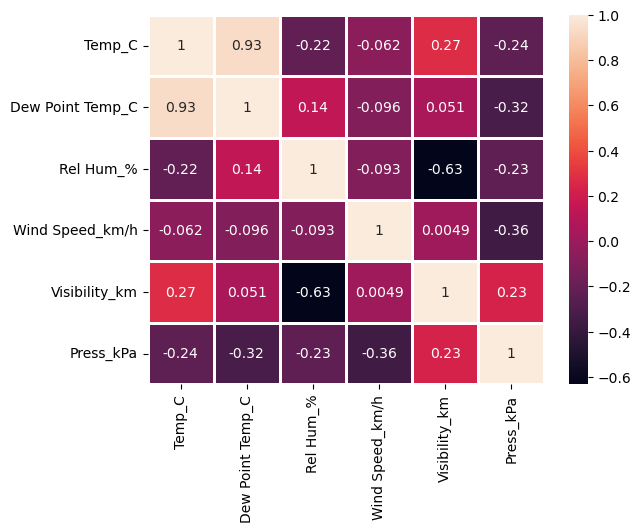

In [7]:
sns.heatmap(data.corr(),annot=True,linewidths=1)

In [8]:
data.drop("Date/Time",axis=1,inplace=True)

In [9]:
data.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,-1.8,-3.9,86,4,8.0,101.24,Fog
1,-1.8,-3.7,87,4,8.0,101.24,Fog
2,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,-1.5,-3.3,88,7,4.8,101.23,Fog


In [10]:
data['Weather'].value_counts()

Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle                        

In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["Weather"]=le.fit_transform(data["Weather"])

In [12]:
x=data.iloc[:,:-1]
x

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
0,-1.8,-3.9,86,4,8.0,101.24
1,-1.8,-3.7,87,4,8.0,101.24
2,-1.8,-3.4,89,7,4.0,101.26
3,-1.5,-3.2,88,6,4.0,101.27
4,-1.5,-3.3,88,7,4.8,101.23
...,...,...,...,...,...,...
8779,0.1,-2.7,81,30,9.7,100.13
8780,0.2,-2.4,83,24,9.7,100.03
8781,-0.5,-1.5,93,28,4.8,99.95
8782,-0.2,-1.8,89,28,9.7,99.91


In [13]:
y=data.iloc[:,-1]
y

0        7
1        7
2        9
3        9
4        7
        ..
8779    35
8780    35
8781    35
8782    35
8783    35
Name: Weather, Length: 8784, dtype: int32

In [14]:
from imblearn.over_sampling import RandomOverSampler
sm=RandomOverSampler()
x,y=sm.fit_resample(x,y)

In [15]:
#splitting to test and train data
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

In [16]:
from sklearn.preprocessing import MinMaxScaler
#minmaxscaler
ms=MinMaxScaler()
X_train=ms.fit_transform(X_train)
X_test=ms.transform(X_test)

# Classification Models

In [17]:
#KNN
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.60      0.76      0.67       414
           1       0.54      0.48      0.51       402
           2       0.97      1.00      0.98       418
           3       1.00      1.00      1.00       455
           4       1.00      1.00      1.00       447
           5       1.00      1.00      1.00       404
           6       1.00      1.00      1.00       411
           7       0.99      1.00      0.99       430
           8       1.00      1.00      1.00       427
           9       0.99      1.00      1.00       391
          10       1.00      1.00      1.00       396
          11       0.99      1.00      0.99       410
          12       1.00      1.00      1.00       413
          13       0.99      1.00      1.00       446
          14       1.00      1.00      1.00       435
          15       1.00      1.00      1.00       408
          16       1.00      1.00      1.00       436
          17       1.00    

In [18]:
knn1=KNeighborsClassifier(algorithm='auto',n_neighbors=9,weights='distance')
knn1.fit(X_train,y_train)
y_pred1=knn1.predict(X_test)
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.69      0.84      0.76       414
           1       0.67      0.58      0.62       402
           2       0.97      1.00      0.99       418
           3       1.00      1.00      1.00       455
           4       1.00      1.00      1.00       447
           5       1.00      1.00      1.00       404
           6       1.00      1.00      1.00       411
           7       0.99      1.00      0.99       430
           8       1.00      1.00      1.00       427
           9       1.00      1.00      1.00       391
          10       1.00      1.00      1.00       396
          11       0.99      1.00      1.00       410
          12       1.00      1.00      1.00       413
          13       1.00      1.00      1.00       446
          14       1.00      1.00      1.00       435
          15       1.00      1.00      1.00       408
          16       1.00      1.00      1.00       436
          17       1.00    

In [19]:
# sv=SVC(C=10, gamma =1, kernel= 'rbf')
# sv.fit(X_train,y_train)
# y_pred2=sv.predict(X_test)
# print(classification_report(y_test,y_pred2))

In [20]:
nb=GaussianNB()
nb.fit(X_train,y_train)
y_pred3=nb.predict(X_test)
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.43      0.29      0.35       414
           1       0.22      0.02      0.04       402
           2       0.49      0.63      0.55       418
           3       0.56      0.38      0.45       455
           4       1.00      1.00      1.00       447
           5       0.99      1.00      0.99       404
           6       0.56      1.00      0.72       411
           7       0.43      0.20      0.27       430
           8       0.28      0.44      0.34       427
           9       0.43      0.34      0.38       391
          10       1.00      1.00      1.00       396
          11       0.41      0.38      0.39       410
          12       0.94      1.00      0.97       413
          13       0.54      0.37      0.44       446
          14       0.29      0.26      0.28       435
          15       1.00      1.00      1.00       408
          16       1.00      1.00      1.00       436
          17       1.00    

In [21]:
dt=DecisionTreeClassifier(criterion='entropy',random_state=2,max_depth=10)
dt.fit(X_train,y_train)
y_pred4=dt.predict(X_test)
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.43      0.57      0.49       414
           1       0.42      0.16      0.24       402
           2       0.66      0.85      0.74       418
           3       0.73      0.88      0.80       455
           4       1.00      1.00      1.00       447
           5       1.00      1.00      1.00       404
           6       1.00      1.00      1.00       411
           7       0.91      0.68      0.77       430
           8       0.77      1.00      0.87       427
           9       1.00      1.00      1.00       391
          10       0.99      1.00      1.00       396
          11       0.87      1.00      0.93       410
          12       1.00      1.00      1.00       413
          13       0.92      0.75      0.83       446
          14       0.95      1.00      0.97       435
          15       1.00      1.00      1.00       408
          16       1.00      1.00      1.00       436
          17       1.00    

In [22]:
rf=RandomForestClassifier(criterion= 'entropy', max_depth= None, min_samples_leaf= 1, min_samples_split= 4,n_estimators= 200)
rf.fit(X_train,y_train)
y_pred5=rf.predict(X_test)
print(classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

           0       0.74      0.84      0.78       414
           1       0.70      0.68      0.69       402
           2       1.00      1.00      1.00       418
           3       1.00      1.00      1.00       455
           4       1.00      1.00      1.00       447
           5       1.00      1.00      1.00       404
           6       1.00      1.00      1.00       411
           7       1.00      1.00      1.00       430
           8       1.00      1.00      1.00       427
           9       1.00      1.00      1.00       391
          10       1.00      1.00      1.00       396
          11       1.00      1.00      1.00       410
          12       1.00      1.00      1.00       413
          13       1.00      1.00      1.00       446
          14       1.00      1.00      1.00       435
          15       1.00      1.00      1.00       408
          16       1.00      1.00      1.00       436
          17       1.00    

In [23]:
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
y_pred6=xgb.predict(X_test)
print(classification_report(y_test,y_pred6))

              precision    recall  f1-score   support

           0       0.70      0.77      0.74       414
           1       0.63      0.58      0.60       402
           2       0.99      1.00      1.00       418
           3       1.00      1.00      1.00       455
           4       1.00      1.00      1.00       447
           5       1.00      1.00      1.00       404
           6       1.00      1.00      1.00       411
           7       1.00      1.00      1.00       430
           8       1.00      1.00      1.00       427
           9       1.00      1.00      1.00       391
          10       1.00      1.00      1.00       396
          11       1.00      1.00      1.00       410
          12       1.00      1.00      1.00       413
          13       1.00      1.00      1.00       446
          14       1.00      1.00      1.00       435
          15       1.00      1.00      1.00       408
          16       1.00      1.00      1.00       436
          17       1.00    

#### THE HIGEST VALUE IS .96 IN XGB